In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Baseline Model

In [2]:
df = pd.read_csv("./train.csv")
df = df.drop(['url', 'timedelta'], axis=1)
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,...,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000
mean,10.396090,546.736560,0.552612,1.003058,0.693278,10.873120,3.284692,4.553271,1.255021,4.548455,...,0.095348,0.757242,-0.259586,-0.521935,-0.107494,0.280653,0.072275,0.342450,0.155627,3364.264386
std,2.117283,472.670058,3.935691,5.848093,3.649376,11.375126,3.851006,8.372558,4.112758,0.844425,...,0.071104,0.248184,0.127366,0.289919,0.094823,0.323644,0.265180,0.188618,0.226548,10742.884480
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,247.000000,0.471080,1.000000,0.625791,4.000000,1.000000,1.000000,0.000000,4.478168,...,0.050000,0.600000,-0.328359,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,945.000000
50%,10.000000,410.000000,0.538784,1.000000,0.690476,7.000000,3.000000,1.000000,0.000000,4.664000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608871,1.000000,0.754717,14.000000,4.000000,4.000000,1.000000,4.854701,...,0.100000,1.000000,-0.187226,-0.300000,-0.050000,0.500000,0.142857,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,690400.000000


In [3]:
# Let's just make sure there is no missing values in the dataset.
# As we can see, we do not have missing values in any of the dataset features.
df.isnull().mean().head()

n_tokens_title              0.0
n_tokens_content            0.0
n_unique_tokens             0.0
n_non_stop_words            0.0
n_non_stop_unique_tokens    0.0
dtype: float64

In [4]:
y = df['shares'].to_frame()
X = df.drop('shares', axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Validation size:", X_test.shape)
print("Training size:", X_train.shape)

Validation size: (6343, 58)
Training size: (25372, 58)


In [6]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

pred = regr.predict(X_test)

print("MSE:", mean_squared_error(y_test, pred)) # 99000098.74925786

MSE: 99066430.15125903


In [7]:
# load the testing data
df_test_X = pd.read_csv("./test.csv")
df_test_X = df_test_X.drop(['url', 'timedelta'], axis=1)
df_test_y = pd.read_csv("./test_target.csv")
print(df_test_X.shape)

(7929, 58)


In [8]:
pred = regr.predict(df_test_X)
print("Test MSE:", mean_squared_error(df_test_y, pred)) # 99000098.74925786

Test MSE: 212834922.19893312


## MultiColinearity

In [9]:
# analize multicolinearity between the predicted variables
# Multicollinearity occurs when the independent variables are too highly correlated with each other.
independent_vars =  df.drop(['shares'], axis=1).copy()
corr = independent_vars.corr()
# [['kw_max_min', 'kw_avg_min', 'kw_max_max', 'kw_avg_max', 'kw_max_avg', 'kw_min_avg']]
# zero out the main diogonal
corr.values[[np.arange(corr.shape[0])]*2] = 0
corr.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
n_tokens_title,0.000000,0.017692,-0.005465,-0.004962,-0.005550,-0.051739,-0.011529,-0.009095,0.052804,-0.071913,...,-0.050339,-0.024713,-0.022913,-0.024264,-0.032667,0.006652,0.077736,-0.002090,-0.148861,0.039915
n_tokens_content,0.017692,0.000000,-0.001827,0.018039,0.002752,0.420099,0.301950,0.342181,0.101826,0.167041,...,0.136961,-0.260795,0.415600,-0.131471,-0.451339,0.225185,0.004539,0.022882,0.007337,0.013475
n_unique_tokens,-0.005465,-0.001827,0.000000,0.999656,0.999881,-0.003894,0.007938,0.022794,-0.000837,0.023789,...,-0.004277,0.006716,-0.011561,0.003749,0.010999,-0.005169,-0.005307,-0.002506,-0.010260,-0.004701
n_non_stop_words,-0.004962,0.018039,0.999656,0.000000,0.999625,0.004928,0.014129,0.031451,-0.001147,0.028398,...,-0.001770,-0.000701,-0.001596,0.001066,0.000942,0.000593,-0.005925,-0.001847,-0.009583,-0.004809
n_non_stop_unique_tokens,-0.005550,0.002752,0.999881,0.999625,0.000000,-0.004454,0.008804,0.018705,-0.001202,0.030743,...,0.000395,0.005996,-0.005419,0.000721,0.006017,-0.004550,-0.006350,-0.003039,-0.009664,-0.005680


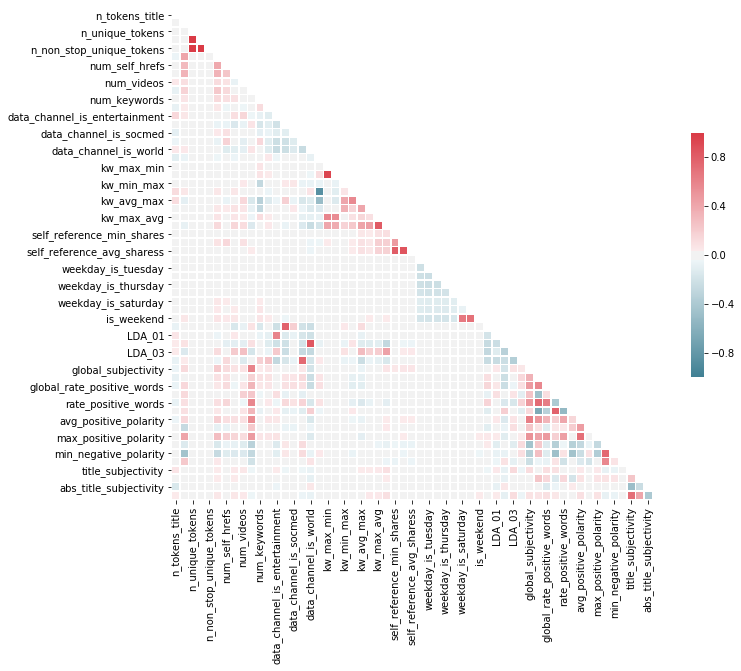

In [10]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
not_multicorrelated_vars = []
for col in corr.columns:
    max_corr = corr[col].max()
    corr_var = corr[col].argmax()
    if max_corr > 0.5:
        print(col, 'correlates with', corr_var, 'by:', max_corr)
    else:
        not_multicorrelated_vars.append(col)

n_unique_tokens correlates with n_non_stop_unique_tokens by: 0.999881388474618
n_non_stop_words correlates with n_unique_tokens by: 0.9996561133090591
n_non_stop_unique_tokens correlates with n_unique_tokens by: 0.999881388474618
average_token_length correlates with global_subjectivity by: 0.598864301627312
data_channel_is_entertainment correlates with LDA_01 by: 0.59663582792288
data_channel_is_bus correlates with LDA_00 by: 0.774827728300371
data_channel_is_tech correlates with LDA_04 by: 0.7474736900575939
data_channel_is_world correlates with LDA_02 by: 0.8365843338395673
kw_max_min correlates with kw_avg_min by: 0.9405604355646446
kw_avg_min correlates with kw_max_min by: 0.9405604355646446
kw_max_max correlates with kw_avg_max by: 0.5633416115970661
kw_avg_max correlates with kw_max_max by: 0.5633416115970661
kw_max_avg correlates with kw_avg_avg by: 0.8128735907307559
kw_avg_avg correlates with kw_max_avg by: 0.8128735907307559
self_reference_min_shares correlates with self_refe

/home/thalles/workspace/virtualenvs/data_science/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  after removing the cwd from sys.path.


In [12]:
not_multicorrelated_vars

['n_tokens_title',
 'n_tokens_content',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_socmed',
 'kw_min_min',
 'kw_min_max',
 'kw_min_avg',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'LDA_03',
 'min_positive_polarity',
 'title_sentiment_polarity',
 'abs_title_subjectivity']

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#gather features
features = "+".join(independent_vars.columns)
# get y and X dataframes based on this regression:
y, X = dmatrices('shares ~' + features, df, return_type='dataframe')

/home/thalles/workspace/virtualenvs/data_science/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [14]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

/home/thalles/workspace/virtualenvs/data_science/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/thalles/workspace/virtualenvs/data_science/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [15]:
vif_score = vif.round(1)
vif_score.head()

,VIF Factor,features
0,0.0,Intercept
1,1.1,n_tokens_title
2,3.3,n_tokens_content
3,17027.6,n_unique_tokens
4,561804.4,n_non_stop_words


In [16]:
not_multicorrelated_vars_vif = list(vif_score.loc[vif_score['VIF Factor'] < 10].features)
not_multicorrelated_vars_vif.remove('Intercept')
print("Number of selected vars:", len(not_multicorrelated_vars_vif))

Number of selected vars: 35


In [17]:
vars_to_use = ['n_tokens_title', 'num_hrefs', 'num_self_hrefs', 'average_token_length', 
               'data_channel_is_entertainment', 'kw_min_max', 'kw_min_avg', 'kw_max_avg', 
               'kw_avg_avg', 'self_reference_min_shares', 'global_subjectivity']

#set(not_multicorrelated_vars_vif).intersection(vars_to_use)

In [18]:
X = df[vars_to_use]
y = df['shares'].to_frame()

In [19]:
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape

(25372, 11)

MSE: 99000098.74925452


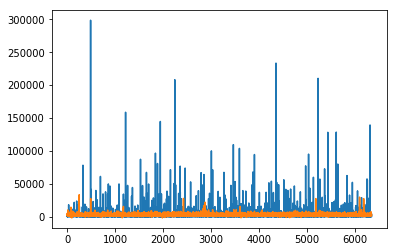

In [20]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

pred = regr.predict(X_test)

print("MSE:", mean_squared_error(y_test, pred))

plt.plot(y_test.values.squeeze(), label="test")
plt.plot(pred.squeeze(), label="pred")

# 99000098.74925452

In [21]:
df_test_X_scaled = X_scaler.transform(df_test_X[vars_to_use])
pred = regr.predict(df_test_X_scaled)
print("Test MSE:", mean_squared_error(df_test_y, pred)) # 99000098.74925786

Test MSE: 212557417.12076643


## Normal Distributions

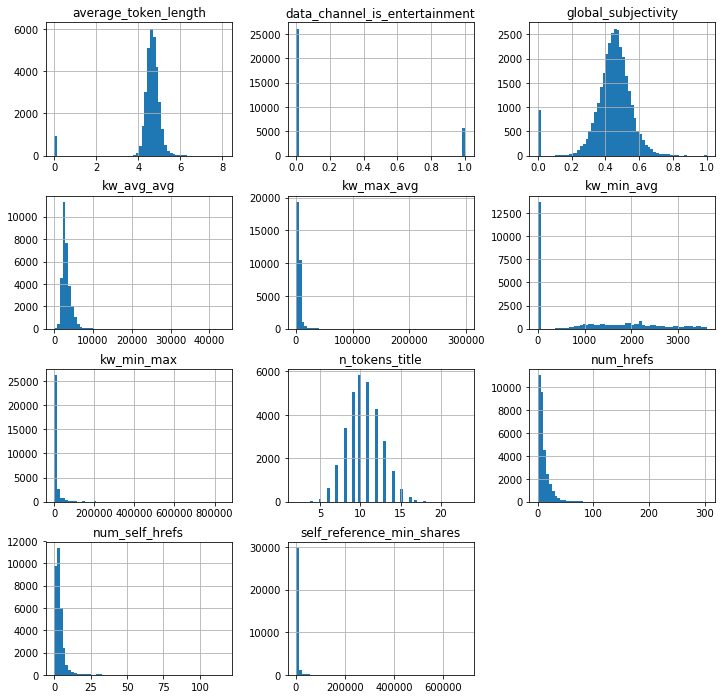

In [22]:
# let's a quick look at the variables distributions
_ = X.hist(bins=60, figsize=(12,12))

In [23]:
def normal_distribution(data):
    X_transformed = pd.DataFrame()
    for col in data:
        if col not in ['data_channel_is_entertainment', 'kw_min_avg']:
            #print("Transforming:", col)
            X_transformed[col] = data[col] ** (1/4)
        else:
            #print("Copying:", col)
            X_transformed[col] = data[col].copy()
    X_transformed.isnull().mean()
    return X_transformed

In [24]:
X_transformed = normal_distribution(X)

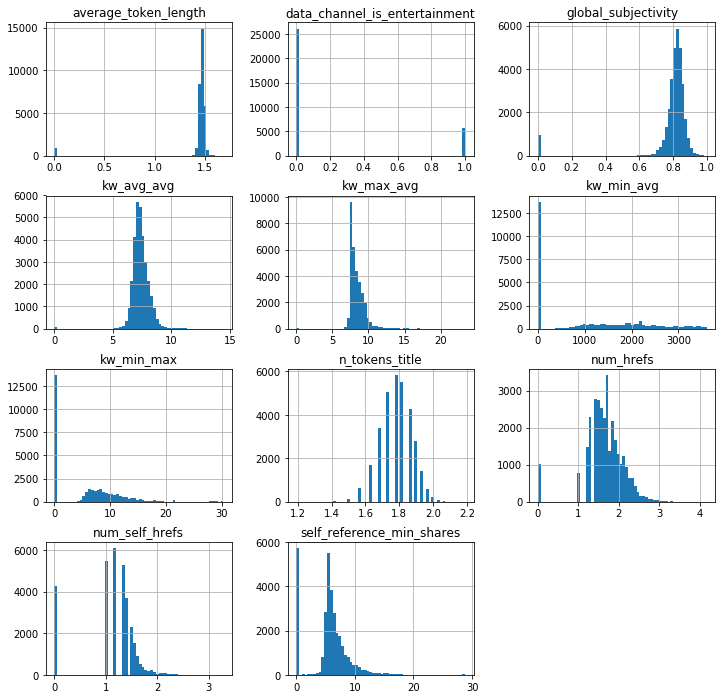

In [25]:
_ = X_transformed.hist(bins=60, figsize=(12,12))

In [26]:
X_scaler = StandardScaler()
X_transformed_scaled = X_scaler.fit_transform(X_transformed)
X_train, X_test, y_train, y_test = train_test_split(X_transformed_scaled, y, test_size=0.2, random_state=42)

In [27]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

pred = regr.predict(X_test)

print("MSE:", mean_squared_error(y_test, pred)) # 99000098.74925786

MSE: 98625520.57670483


In [28]:
# test data error

test_set = df_test_X[vars_to_use]
test_set = normal_distribution(test_set)

df_test_X_scaled = X_scaler.transform(test_set)
pred = regr.predict(df_test_X_scaled)
print("Test MSE:", mean_squared_error(df_test_y, pred)) # 99000098.74925786

Test MSE: 212365320.9959406


In [29]:
clf = linear_model.SGDRegressor(random_state=42)
clf.fit(X_train, y_train.values.squeeze())
pred = clf.predict(X_test)
print("MSE:", mean_squared_error(y_test, pred)) # 99000098.74925786

MSE: 98890716.95892848


/home/thalles/workspace/virtualenvs/data_science/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
